In [1]:
import numpy as np
import os
import pandas as pd
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
import pdfplumber
import struct
from uuid import uuid4
from scipy.optimize import curve_fit
from pathlib import Path
from shapely import MultiLineString, Point
from docx import Document
from docx.table import _Cell
from package.utils import re_json
from routers.collection.service import deviceIpService, dataItemService, routerService

2024-09-25 17:13:37,389 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-09-25 17:13:37,394 INFO sqlalchemy.engine.Engine SELECT device_ip.id, device_ip.title, device_ip.name, device_ip.ip, device_ip.grant 
FROM device_ip 
WHERE device_ip.grant = ?
2024-09-25 17:13:37,394 INFO sqlalchemy.engine.Engine [generated in 0.00041s] (1,)


In [ ]:
datapath = r"E:\工作文档\开州项目\编号.xlsx"
df = pd.read_excel(datapath)
df = df.fillna("")
TBBH_list = set(df["TBBH"].values)
for tbbh in TBBH_list:
    data = df[df["TBBH"] == tbbh]
    xh_list = list({int(v) for v in data["xh"].values if v != ""})
    xh = 0
    if xh_list:
        xh_max = max(xh_list)
        for i in xh_list:
            data_xh = data[data["xh"] == i]
            for index, row in data_xh.iterrows():
                if xh == 0:
                    xh += 1
                    continue
                else:
                    df.loc[index, "xh"] = xh + xh_max
                    xh += 1
        xh = 0
    else:
        for index, row in data.iterrows():
            xh += 1
            df.loc[index, "xh"] = xh
        xh = 0

df.to_excel(r"E:\工作文档\开州项目\重新编号.xlsx")


In [5]:
df = pd.read_excel(r"C:\Users\Administrator\Desktop\面积最大.xlsx")
dfdata = pd.DataFrame(columns=df.columns)
CGBH = set(df.CGBH.values)
for v in CGBH:
    CGBH_temp = df[df.CGBH == v]
    Area = CGBH_temp.Area.values
    Area_max = max([value for value in Area])
    res = CGBH_temp[CGBH_temp.Area == Area_max].values[0]
    dfdata.loc[dfdata.shape[0]] = [*res]
dfdata.to_excel(r"E:\工作文档\qita\台账过程\新建文件夹\aa.xlsx", index=False)

In [ ]:
dataset = rasterio.open(r"F:\日常变更影像\0715\国梁等27个日常变更影像\01.jpg")
pass
# arr = dataset.read(1)
# df = pd.DataFrame(arr)
# df.to_excel(r'E:\工作文档\测试导出数据\01.xlsx',index=False)


In [27]:
gdbpath = r"E:\工作文档\云阳县城市国土空间监测\gdb数据库\道路拓扑.gdb"
save = r"E:\工作文档\云阳县城市国土空间监测"
LVLL = gpd.read_file(gdbpath, layer="LVLL")
LRDL = gpd.read_file(gdbpath, layer="LRDL")
LCTL = gpd.read_file(gdbpath, layer="LCTL")
hb = gpd.read_file(gdbpath, layer="合并")


def inspect(shp, savapath):
    resdf = gpd.GeoDataFrame(columns=["dlbm", "x", "y", "add", "geometry"])
    for _, row in shp.iterrows():
        if type(row.geometry) == MultiLineString:
            point_xy = row.geometry.geoms[0].xy
        else:
            point_xy = row.geometry.xy
        po1 = Point(point_xy[0][0], point_xy[1][0])
        po2 = Point(point_xy[0][-1], point_xy[1][-1])
        resdf.loc[resdf.shape[0]] = [
            row.RN,
            point_xy[0][0],
            point_xy[1][0],
            f"{point_xy[0][0]}{point_xy[1][0]}",
            po1,
        ]
        resdf.loc[resdf.shape[0]] = [
            row.RN,
            point_xy[0][-1],
            point_xy[1][-1],
            f"{point_xy[0][-1]}{point_xy[1][-1]}",
            po2,
        ]
    resdf.crs = shp.crs
    resdf.to_file(savapath)


inspect(hb, os.path.join(save, "检查.shp"))

In [2]:
def get_folder_size(folder_path):
    # 计算文件夹大小
    total_size = 0
    for path, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(path, file)
            total_size += os.path.getsize(file_path)
    return total_size


a = get_folder_size(r"C:\Users\Administrator\AppData\Local")
a

18831845140

In [3]:
def TopAdd(DictoAdjs, MJtoAdjs, AddNums):
    try:
        Count = abs(MJtoAdjs)
        # arcpy.AddMessage(DicLen)
        if MJtoAdjs < 0:
            AddNums = -AddNums
        i = 0
        for key in DictoAdjs.keys():
            if i < Count:
                # if key == u'370982211000059509':
                #    arcpy.AddMessage(str(DictoAdjs[key][0])+ " TopAdd " + str(Decimal(AddNums)))
                DictoAdjs[key][0] = (
                    Decimal(DictoAdjs[key][0]) + Decimal(AddNums)
                ).quantize(Decimal("0.00"))
                i += 1
            else:
                break
        # arcpy.AddMessage(DictoAdjs)
        return DictoAdjs
    except Exception as e:
        arcpy.AddMessage("出错" + e.message)
        return DictoAdjs


0.30000000000000004

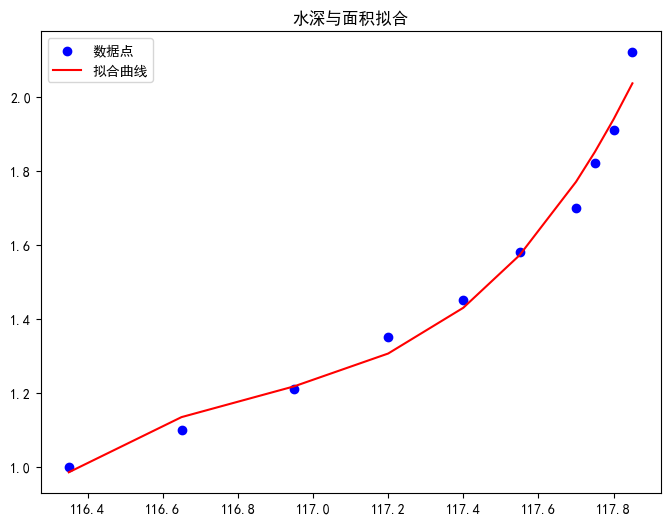

In [3]:
def log_func(x, A, B, C, D):
    # 拟合函数
    return A * (x**3) + B * (x**2) + C * x + D


# 创建数据点
x_data = np.array(
    [116.35, 116.65, 116.95, 117.2, 117.4, 117.55, 117.7, 117.75, 117.8, 117.85]
)
y_data = np.array([1, 1.1, 1.21, 1.35, 1.45, 1.58, 1.7, 1.82, 1.91, 2.12])

# 拟合数据
popt, pcov = curve_fit(log_func, x_data, y_data)

# 绘制数据和拟合曲线
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, label=r"数据点", color="blue")
plt.plot(x_data, log_func(x_data, *popt), "r-", label="拟合曲线")
plt.legend()
plt.title("水深与面积拟合")
plt.show()

In [ ]:
def extract_tables_from_pdf(pdf_path):
    tables = []
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            table_data = page.extract_tables()
            if table_data:
                tables.extend(table_data)
    return tables


def add_table_to_docx(doc, table_data):
    table = doc.add_table(rows=len(table_data), cols=len(table_data[0]))
    for i, row in enumerate(table_data):
        for j, cell_data in enumerate(row):
            cell: _Cell = table.cell(i, j)
            cell.text = str(cell_data)
    return table


def pdf_to_word(pdf_path, word_path):
    doc = Document()
    tables = extract_tables_from_pdf(pdf_path)
    for table_data in tables:
        add_table_to_docx(doc, table_data)
    doc.save(word_path)


# 指定PDF文件和输出的Word文件路径
pdf_file = r"E:\工作文档\资料标准文件\303-自然资源监测培训ppt及材料\5.pdf"
docx_file = r"E:\工作文档\资料标准文件\303-自然资源监测培训ppt及材料\5-2.docx"

# 调用函数进行转换
pdf_to_word(pdf_file, docx_file)


In [ ]:
images_data_path = Path(r"D:\深度学习\MNIST数据集\train-images.idx3-ubyte").read_bytes()
labels_data_path = Path(r"D:\深度学习\MNIST数据集\train-labels.idx1-ubyte").read_bytes()
images_data = np.frombuffer(images_data_path, np.uint8)
labels_data = np.frombuffer(labels_data_path, np.uint8)
data = images_data[16:].reshape([-1, 28])
plt.matshow(data[28:56], cmap=plt.get_cmap("gray"))
plt.show()

[-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[0 0 0 0 0 0 0 0 0 1 2 3 4 5 6 7 8]


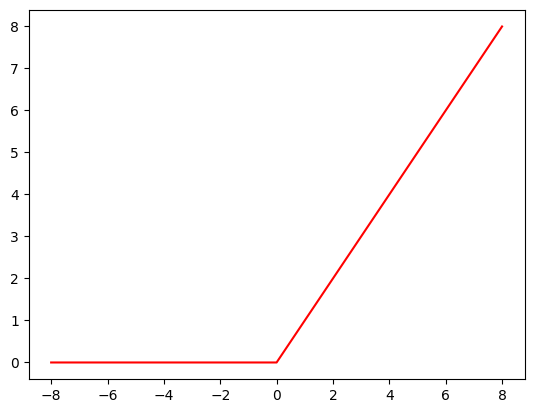

[-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

In [11]:
def RrlU(x):
    return np.maximum(0, x)


a = [-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
print(a)
print(RrlU(a))
plt.plot(a, RrlU(a), "r-", label="拟合曲线")
plt.show()

a

In [13]:
a = np.array([3, 54, 3])
a.reshape(1, a.size)

array([[ 3, 54,  3]])

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 监督数据是one-hot-vector的情况下，转换为正确解标签的索引
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


a = np.array([3, 54, 3])
res = cross_entropy_error(a, np.array([4, 6, 7]))
res


In [ ]:
from routers.collection.do import *
from routers.common.engine import craete_table

craete_table()

In [2]:
class A:
    def __init__(self):
        self.a = 1

    def print_a(self):
        print(self.a)


class B(A):
    def print_a(self):
        super().print_a()
        print("b")


b = B()
b.a

1

In [2]:
res = re_json(r"C:\Users\Administrator\Desktop\menuitemURL.json")
# res = routerService.select({"path": "xm1"})
# res

In [ ]:
result = []


def convert(data, router_name, parent_name=None):
    for row in data:
        if row["child"]:
            result.append(
                {
                    "title": row["title"],
                    "name": row["name"],
                    "URL": row["URL"],
                    "path": row["path"],
                    "color": row["color"],
                    "parent_name": parent_name if parent_name else "top",
                    "router_name": router_name,
                    "is_group": False,
                }
            )
        else:
            result.append(
                {
                    "title": row["title"],
                    "name": row["name"],
                    "color": row["color"],
                    "parent_name": parent_name if parent_name else "top",
                    "router_name": router_name,
                    "is_group": True,
                }
            )
            try:
                convert(row["children"], router_name, row["name"])
            except:
                pass


for router_name in res:
    sele_res = routerService.select({"path": router_name})
    convert(res[router_name]["data"], sele_res[0].name)

dataItemService.insert(result)

In [ ]:
from routers.manage.service import ManageService

serv = ManageService()
# res = serv.dataItemService.select({'id':1})
res = serv.getDataItemTree()
res

In [ ]:
res = dataItemService.select({"id": 1})
res

In [11]:
from PIL import Image
import piexif


def get_gps_info(image_path):
    # 打开图片
    img = Image.open(image_path)
    # 获取Exif信息
    exif_dict = piexif.load(img.info["exif"])

    if "GPS" in exif_dict:
        gps_info = exif_dict["GPS"]

        # 解析经纬度
        def dms_to_dd(dms, ref):
            degrees = dms[0][0] / dms[0][1]
            minutes = dms[1][0] / dms[1][1] / 60.0
            seconds = dms[2][0] / dms[2][1] / 3600.0

            if ref in ["S", "W"]:
                degrees = -degrees
                minutes = -minutes
                seconds = -seconds

            return round(degrees + minutes + seconds, 7)

        lat = dms_to_dd(gps_info[2], gps_info[1])
        lon = dms_to_dd(gps_info[4], gps_info[3])

        print(f"纬度: {lat}, 经度: {lon}")
    else:
        print("没有找到GPS信息")


# 调用函数并传入图片路径
get_gps_info(r"C:\Users\Administrator\Desktop\IMG_20240920_163336.jpg")

没有找到GPS信息


In [2]:
# 处理点云数据
import laspy
import numpy as np
from pathlib import Path

path_ = r"E:\工作文档\万州区\水资源\点云"

files = Path(path_).glob("*.las")

for file in files:
    with open(r"E:\工作文档\万州区\水资源\点云\点云.xyz", "a") as f:
        las = laspy.read(file)
        for i in range(len(las.x)):
            xyz = f"{las.x[i]},{las.y[i]},{las.z[i]}"
            f.write(xyz + "\n")


# 读取LAS文件
file_path = r"E:\工作文档\万州区\水资源\点云\鱼背山1地面点.las"
las = laspy.read(file_path)


# 访问点云数据
points = np.vstack((las.x, las.y, las.z)).transpose()

# 打印前5个点的坐标
print(points[:5])

# 访问其他属性
intensity = las.intensity
classification = las.classification
return_number = las.return_number
number_of_returns = las.number_of_returns

# 打印前5个点的强度和分类
print(intensity[:5])
print(classification[:5])

# 创建新的LAS文件
new_file_path = "path/to/your/new_file.las"
header = laspy.LasHeader(point_format=las.point_format, version=las.version)
with laspy.open(new_file_path, mode="w", header=header) as writer:
    writer.write_points(las.points)

print(f"新文件已保存到 {new_file_path}")

KeyboardInterrupt: 

In [1]:
# 处理点云数据
import laspy
import numpy as np
from pathlib import Path

path_ = r"E:\工作文档\万州区\水资源\点云"

files = Path(path_).glob("*.las")
# files = [Path(r"E:\工作文档\万州区\水资源\点云\鱼背山6地面点.las")]
for file in files:
    with open(r"E:\工作文档\万州区\水资源\点云\点云.xyz", "a") as f:
        las = laspy.read(file)
        for i in range(len(las.x)):
            xyz = f"{las.x[i]},{las.y[i]},{las.z[i]}"
            f.write(xyz + "\n")

In [4]:
df = pd.read_excel(r"E:\工作文档\梁平区\计算水深平均值.xlsx")
sh = {}


def convert(row):
    if row.code not in sh:
        sh[row.code] = []
    sh[row.code].append(float(row.sh))


df.apply(convert, axis=1)
sh_pj = pd.DataFrame(columns=["code", "sh"])
for i in sh:
    sh_pj.loc[len(sh_pj)] = [i, sum(sh[i]) / len(sh[i])]
sh_pj.to_excel(r"E:\工作文档\梁平区\计算水深平均值2.xlsx", index=False)


In [9]:
def Degree(d=0, f=0, m=0):
    return d + f / 60 + m / 3600


def sec(d=0, f=0, m=0):
    return d * 3600 + f * 60 + m


def degrees_to_dms(degrees):
    d = int(degrees)
    minutes_t = (degrees - d) * 60
    m = int(minutes_t)
    s = (minutes_t - m) * 60
    return [d, m, s]


# 百万经差6度,纬差4度
# jc = Degree(0, 3, 45)  # 经差
# wc = Degree(0, 2, 30)  # 纬差
# x = [108, 30, 0.0]  # 经度
# y = [30, 30, 0.0]
# x_ = int(x / jc) * jc
# y_ = int(y / wc) * wc
# print(degrees_to_dms(x_), degrees_to_dms(wc))
# print(wc)

In [16]:
def TFH(latitude, longitude):
    million_latitude = [chr(i) for i in range(65, 91)]
    million_row = million_latitude[int(longitude[0] / 4)]
    million_col = int(latitude[0] / 6) + 1
    wd = sec(*longitude)  # 经度十进制值
    jd = sec(*latitude)  # 纬度十进制值
    w_row = str(96 - int((wd - int(wd / 14400) * 14400) / 150) + 1)
    w_col = str(int((jd - int(jd / 21600) * 21600) / 225) + 1)
    row_h = "0" * (3 - len(w_row))
    col_h = "0" * (3 - len(w_col))
    return f"{million_row}{million_col}G{row_h}{w_row}{col_h}{w_col}"

In [2]:
%%time
import numpy as np
from package.concurrent import parallel

result1 = []


def call(x):
    return x**2


# result1 = parallel(call, range(10000000))

for i in range(10000000):
    result1.append(call(i))
print(len(result1))

10000000
CPU times: total: 1.11 s
Wall time: 1.11 s


In [2]:
res = routerService.select({"router_type": "manage"})
res

2024-09-25 17:13:41,512 INFO sqlalchemy.engine.Engine SELECT router.id, router.title, router.name, router.path, router.router_type 
FROM router 
WHERE router.router_type = ?
2024-09-25 17:13:41,512 INFO sqlalchemy.engine.Engine [generated in 0.00095s] ('manage',)


[RouterDO(path='manage', name='4dd849d3ce9e4b0894fa02e9db62b96b', router_type='manage', title='manage', id=12)]